In [637]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
import sklearn.metrics as sm
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [638]:
# Reading csv files
women = pd.read_csv('athletes-women.csv')
men = pd.read_csv('athletes-men.csv')

# CSV with only US athletes
men_us = pd.read_csv('us_men.csv')

In [639]:
df_women = women[['rank', 'age', 'run5k', 'pullups', 'fran', 'longitude', 'latitude']]
X_w = scale(df_women)
X[0:10,]

df_men = men[['rank', 'age', 'run5k', 'pullups', 'fran', 'longitude', 'latitude']]
X_m = scale(df_men)
M[0:10,]

array([[-7.76486798e-01, -4.46116726e-01, -1.36309095e+00,
         1.22142244e+00, -1.20552539e+00, -4.63642635e-01,
         4.30498755e-01],
       [-7.76486798e-01,  5.18902359e-02, -1.00485642e+00,
         1.12376328e+00, -1.20552539e+00, -7.66632917e-01,
         2.25775951e-01],
       [-6.32996453e-01, -9.44123687e-01, -4.39222957e-01,
         6.35467475e-01, -1.20552539e+00, -2.07818476e-01,
         4.39058645e-01],
       [-3.93845877e-01,  5.18902359e-02, -7.22039690e-01,
         1.47171672e-01, -1.20552539e+00, -7.52981851e-01,
         2.99661058e-01],
       [-2.98185647e-01, -7.44920903e-01, -7.22039690e-01,
        -4.38783292e-01, -1.20552539e+00, -6.73652684e-01,
         1.68202436e-01],
       [ 1.18454792e+00, -7.44920903e-01,  2.20682754e-01,
        -1.45805810e-01, -1.20552539e+00, -6.73652684e-01,
         1.68202436e-01],
       [-6.32996453e-01, -4.77111565e-02, -1.49978571e-02,
         1.47171672e-01, -1.17967398e+00, -7.01510232e-01,
        -2.0196248

Text(0.5, 1.0, 'K-Means Classification Location')

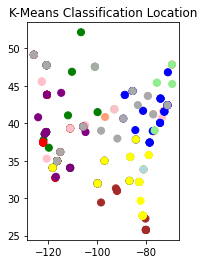

In [666]:
mask = (df['longitude'] >= -135) & (df['longitude'] <= -60) & (df['latitude'] >= 25) & (df['latitude'] <= 60)
# mask = (df['longitude'] >= -85) & (df['longitude'] <= -75) & (df['latitude'] >= 25) & (df['latitude'] <= 35)
df2 = df.loc[mask]
df2
x = scale(df2)
color_theme = np.array(['darkgray','lightsalmon', 'blue', 'red', 'green', 'yellow', 'purple', 'black', 'brown', 'pink', 'lightblue', 'lightgreen'])
clustering = KMeans(n_clusters=12,random_state=4)
clustering.fit(x)
plt.subplot(1,2,2)
plt.scatter(x=df2['longitude'],y=df2['latitude'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Location')

Text(0.5, 1.0, 'K-Means Classification Location')

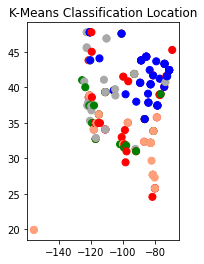

In [654]:
# old version for us
df_men_us = men_us[['rank', 'age', 'run5k', 'pullups', 'fran', 'longitude', 'latitude']]
X_us_men = scale(df_men_us)
X_us_men[0:10,]
x = scale(X_us_men)

color_theme = np.array(['darkgray','lightsalmon', 'blue', 'red', 'green', 'yellow', 'purple', 'black', 'brown', 'pink', 'lightblue', 'lightgreen'])
clustering = KMeans(n_clusters=5,random_state=4)
clustering.fit(x)
plt.subplot(1,2,2)
plt.scatter(x=df_men_us['longitude'],y=df_men_us['latitude'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Location')

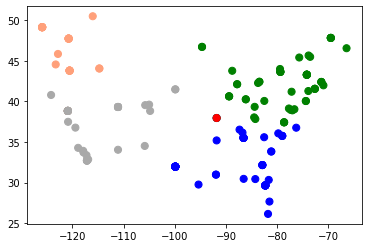

In [657]:
# location women us
mask = (df_women['longitude'] >= -135) & (df_women['longitude'] <= -60) & (df_women['latitude'] >= 25) & (df_women['latitude'] <= 60) #& (df_women['age'] <= 34) & (df_women['rank'] <= 50)

l = df_women.loc[mask]

df_women_us=l.loc[:,['rank','latitude','longitude']]

X_w_us = scale(df_women_us)


num_clusters = 5



color_theme = np.array(['darkgray','lightsalmon', 'blue', 'red', 'green', 'orange', 'purple', 'black', 'brown', 'pink', 'lightblue', 'lightgreen', 'teal'])

clustering = KMeans(n_clusters=num_clusters, random_state=5)

clustering.fit(X_w_us)



df_women_us['cluster_label'] = kmeans.fit_predict(df_women_us[df_women_us.columns[1:3]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(df_women_us[df_women_us.columns[1:3]]) # Labels of each point

df_women_us.head(10)



plt.scatter(x=df_women_us['longitude'],y=df_women_us['latitude'],c=color_theme[clustering.labels_],s=50)

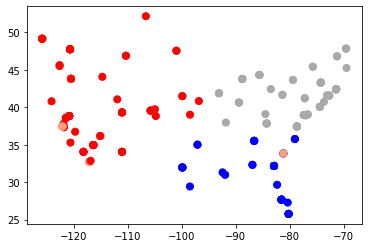

In [658]:
# location men us
mask = (df_men['longitude'] >= -135) & (df_men['longitude'] <= -60) & (df_men['latitude'] >= 25) & (df_men['latitude'] <= 60) #& (df_women['age'] <= 34) & (df_women['rank'] <= 50)
l = df_men.loc[mask]
df_men_us=l.loc[:,['rank','latitude','longitude']]
X_m_us = scale(df_men_us)



num_clusters = 4



color_theme = np.array(['darkgray','lightsalmon', 'blue', 'red', 'green', 'orange', 'purple', 'black', 'brown', 'pink', 'lightblue', 'lightgreen', 'teal'])
clustering = KMeans(n_clusters=num_clusters, random_state=5)
clustering.fit(X_m_us)



df_men_us['cluster_label'] = kmeans.fit_predict(df_men_us[df_men_us.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(df_men_us[df_men_us.columns[1:3]]) # Labels of each point
df_men_us.head(10)



plt.scatter(x=df_men_us['longitude'],y=df_men_us['latitude'],c=color_theme[clustering.labels_],s=50)

In [662]:
# clustering = KMeans(n_clusters=3,random_state=5)
# clustering.fit(X_m)

In [663]:
# df.columns = ['rank', 'age', 'run5k', 'pullups', 'fran', 'longitude', 'latitude']

In [664]:
# All men clustering setups
clustering = KMeans(n_clusters=3,random_state=5)
clustering.fit(X_m)
df.columns = ['rank', 'age', 'run5k', 'pullups', 'fran', 'longitude', 'latitude']

Text(0.5, 1.0, 'K-Means Classification Pullups')

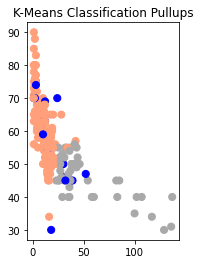

In [665]:
color_theme = np.array(['darkgray','lightsalmon', 'blue'])

plt.subplot(1,2,2)
plt.scatter(x=df_men['rank'],y=df_men['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups')

Text(0.5, 1.0, 'K-Means Classification Location')

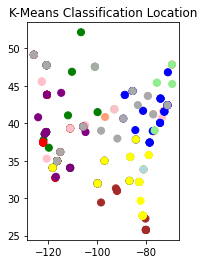

In [180]:
mask = (df['longitude'] >= -135) & (df['longitude'] <= -60) & (df['latitude'] >= 25) & (df['latitude'] <= 60)
df2 = df.loc[mask]
df2

,rank,age,run5k,pullups,fran,longitude,latitude
0,9,34,1204,45,53,-125.9066,49.1530
1,1,26,1180,80,124,-76.2875,36.7682
2,4,31,1110,40,125,-87.3595,36.5298
4,3,34,1263,55,128,-81.7948,26.1420
6,4,29,1182,35,130,-73.8729,45.6689
...,...,...,...,...,...,...,...
217,18,51,1400,39,355,-120.5542,43.8041
218,17,54,1349,42,368,-88.7879,43.7844
220,9,53,1224,40,396,-83.4833,42.4311
223,4,50,1353,51,235,-117.9003,33.9165


Text(0.5, 1.0, 'K-Means Classification Location')

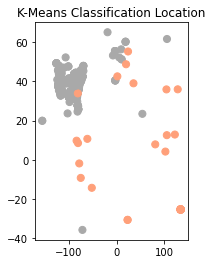

In [105]:
plt.subplot(1,2,2)
plt.scatter(x=df['longitude'],y=df['latitude'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Location')

ValueError: 'c' argument has 223 elements, which is inconsistent with 'x' and 'y' with size 286.

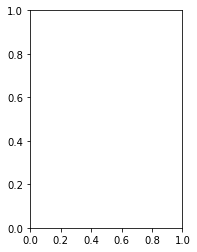

In [597]:
plt.subplot(1,2,2)
plt.scatter(x=df['rank'],y=df['run5k'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Run5k')

In [106]:
# df2 = df.iloc[:, lambda x: x.index >= 18 and x.index <= 34]
# df2 = df['age'].between(18, 34, inclusive=True)
mask = (df['age'] >= 18) & (df['age'] <= 34)
df2 = df.loc[mask]
df2.head()
x = scale(df2)
clustering = KMeans(n_clusters=2,random_state=5)
clustering.fit(x)

KMeans(n_clusters=2, random_state=5)

Text(0.5, 1.0, 'K-Means Classification Fran')

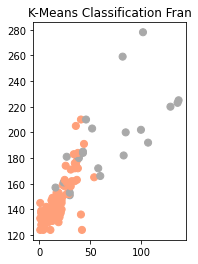

In [107]:
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['fran'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Fran')

Text(0.5, 1.0, 'K-Means Classification Pullups by age')

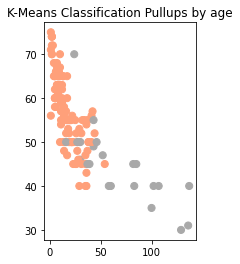

In [108]:
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups by age')

Text(0.5, 1.0, 'K-Means Classification Location')

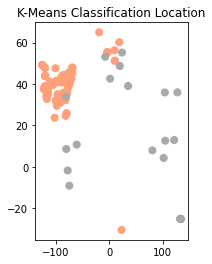

In [109]:
plt.subplot(1,2,2)
plt.scatter(x=df2['longitude'],y=df2['latitude'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Location')

Text(0.5, 1.0, 'K-Means Classification Pullups')

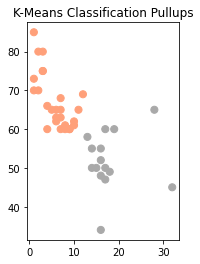

In [98]:
mask = (df['age'] >= 34) & (df['age'] <= 39)
df2 = df.loc[mask]
df2.head()
x = scale(df2)
clustering = KMeans(n_clusters=2,random_state=5)
clustering.fit(x)
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups by age')